In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys, h5py

from scipy.optimize import *
from scipy.integrate import *
from scipy.signal import *

import FuncLib as Func

Welcome to JupyROOT 6.20/04


In [2]:
'''butterworth'''
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq
    b,a = butter(order, [low, high], btype='band')
    return b,a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5) :
    b,a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b,a,data)
    return y

<KeysViewHDF5 ['wave']>
(6580,)


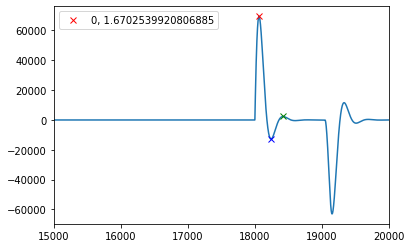

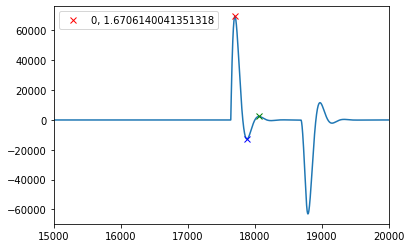

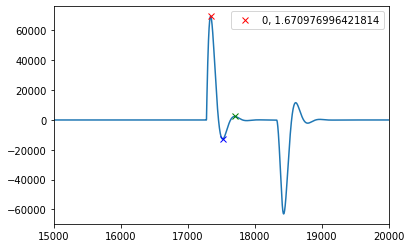

 q


In [8]:
lowcut = 200
highcut = 500
fs = 100e+3
order = 1
conversion_factor = 10./2**18
base_end = 17200

h5file = '/home/wootaekim/work/h5py_read/H5PROD_TEST/test_0.h5'
with h5py.File(h5file, 'r') as f :
    print (f.keys())
    dset = f['wave']
    print (dset.shape)
    for i in range(dset.shape[0]) :
        
        h = dset[i][2]
        l = dset[i][3]
        h_ana = Func.heat_ana(h, conversion_factor, fs, np.mean(h[14000:17000]), np.std(h[14000:17000]), base_end)
        #plt.plot(h)
        #plt.plot(h_ana[0], h_ana[1], 'x')
        #plt.plot(h_ana[2], h_ana[5], 'x')
        #plt.plot(h_ana[4], h_ana[7], 'x')
        #plt.xlim(15000,20000)
        #plt.show()
        
        band_h = butter_bandpass_filter(h-h[0], lowcut, highcut, fs, order=order)
        band_l = butter_bandpass_filter(l-l[0], lowcut, highcut, fs, order=order)
        
        h_band_ana = Func.heat_filter_ana(lowcut, highcut, order, h, conversion_factor, fs, base_end)
        plt.plot(band_h)
        plt.plot(h_band_ana[0], h_band_ana[1], 'rx', label='{0}, {1}'.format(dset[i][0], dset[i][1]))
        plt.plot(h_band_ana[4], h_band_ana[5], 'bx')
        plt.plot(h_band_ana[6], h_band_ana[7], 'gx')
        plt.xlim(15000,20000)
        plt.legend()
        plt.show()
        
        a = input()
        if (a == 'q') :
            break
        

In [13]:
pd_array = [pd.DataFrame({'A' : [1], 'B' : [2]}) for _ in range(2)]

In [16]:
print (pd_array[0])
print (pd_array[1])

   A  B
0  1  2
   A  B
0  1  2


In [ ]:
for _ in 